In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from collections import Counter
from transformers import AutoTokenizer

# Cấu hình matplotlib để hiển thị tiếng Việt
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("✅ Đã import thành công các thư viện!")


✅ Đã import thành công các thư viện!


In [2]:
def load_raw_data_for_eda(data_path):
    """Tải dữ liệu thô để phân tích"""
    def read_split_data(split_name):
        split_path = os.path.join(data_path, split_name)
        
        # Thử các encoding để đọc dữ liệu tiếng Việt
        encodings = ['utf-8', 'utf-8-sig', 'latin-1']
        
        for encoding in encodings:
            try:
                with open(os.path.join(split_path, 'sents.txt'), 'r', encoding=encoding) as f:
                    texts = [line.strip() for line in f.readlines()]
                
                with open(os.path.join(split_path, 'sentiments.txt'), 'r', encoding=encoding) as f:
                    sentiments = [int(line.strip()) for line in f.readlines()]
                
                with open(os.path.join(split_path, 'topics.txt'), 'r', encoding=encoding) as f:
                    topics = [int(line.strip()) for line in f.readlines()]
                
                return texts, sentiments, topics
            except:
                continue
        
        raise Exception(f"Không thể đọc {split_name}")
    
    # Tải tất cả các split
    raw_data = {}
    for split in ['train', 'dev', 'test']:
        texts, sentiments, topics = read_split_data(split)
        raw_data[split] = {
            'texts': texts,
            'sentiments': sentiments,
            'topics': topics
        }
        print(f"✅ Đã tải {split}: {len(texts)} mẫu")
    
    return raw_data

# Tải dữ liệu thô
raw_data = load_raw_data_for_eda('../data/raw')
print(f"\n📁 Tổng số split: {len(raw_data)}")


✅ Đã tải train: 11426 mẫu
✅ Đã tải dev: 1583 mẫu
✅ Đã tải test: 3166 mẫu

📁 Tổng số split: 3


In [3]:
# Thống kê tổng quan dữ liệu thô
print("="*60)
print("📊 THỐNG KÊ DỮ LIỆU THÔ")
print("="*60)

total_samples = 0
for split_name, data in raw_data.items():
    n_samples = len(data['texts'])
    total_samples += n_samples
    
    # Đếm phân bố sentiment
    sentiment_counts = Counter(data['sentiments'])
    topic_counts = Counter(data['topics'])
    
    print(f"\n📁 {split_name.upper()}:")
    print(f"   Tổng mẫu: {n_samples:,}")
    print(f"   Sentiment: Negative={sentiment_counts[0]}, Neutral={sentiment_counts[1]}, Positive={sentiment_counts[2]}")
    print(f"   Topic: {dict(topic_counts)}")

print(f"\n🔢 TỔNG CỘNG: {total_samples:,} mẫu")


📊 THỐNG KÊ DỮ LIỆU THÔ

📁 TRAIN:
   Tổng mẫu: 11,426
   Sentiment: Negative=5325, Neutral=458, Positive=5643
   Topic: {1: 2201, 0: 8166, 3: 562, 2: 497}

📁 DEV:
   Tổng mẫu: 1,583
   Sentiment: Negative=705, Neutral=73, Positive=805
   Topic: {1: 267, 0: 1151, 3: 95, 2: 70}

📁 TEST:
   Tổng mẫu: 3,166
   Sentiment: Negative=1409, Neutral=167, Positive=1590
   Topic: {0: 2290, 1: 572, 3: 159, 2: 145}

🔢 TỔNG CỘNG: 16,175 mẫu


C:\Users\huynh\AppData\Local\Temp\ipykernel_2008\2136245522.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\huynh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


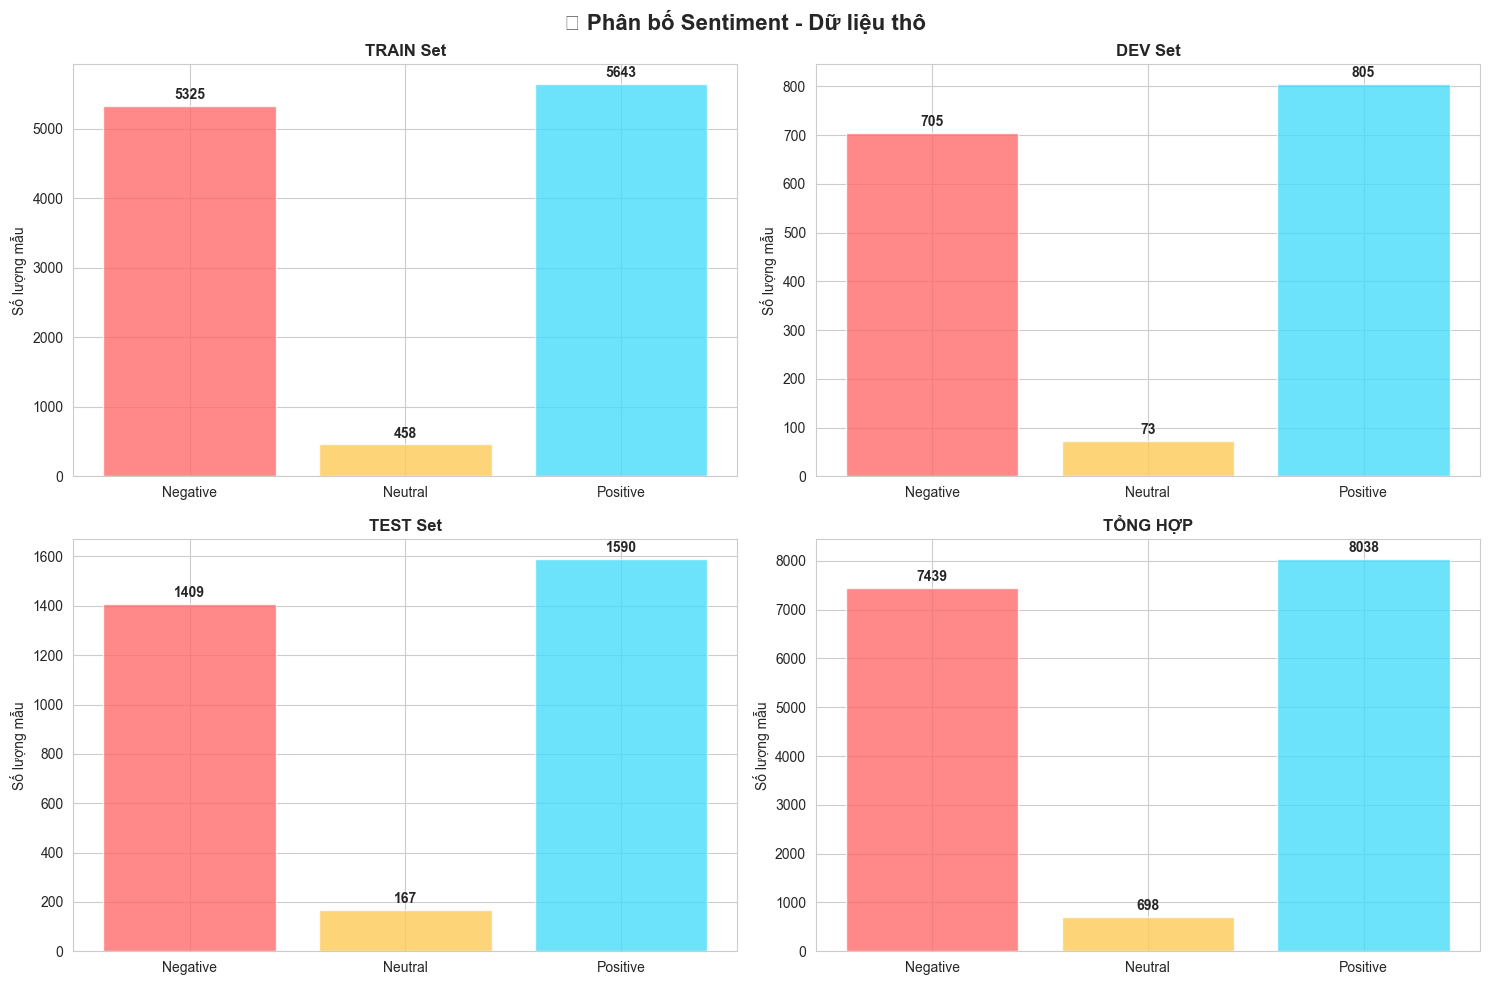

In [4]:
# Visualize phân bố sentiment trong dữ liệu thô
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Phân bố Sentiment - Dữ liệu thô', fontsize=16, fontweight='bold')

sentiment_labels = ['Negative', 'Neutral', 'Positive']
colors = ['#ff6b6b', '#feca57', '#48dbfb']

# Plot cho từng split
for idx, (split_name, data) in enumerate(raw_data.items()):
    row, col = idx // 2, idx % 2
    sentiment_counts = Counter(data['sentiments'])
    
    counts = [sentiment_counts[i] for i in range(3)]
    axes[row, col].bar(sentiment_labels, counts, color=colors, alpha=0.8)
    axes[row, col].set_title(f'{split_name.upper()} Set', fontweight='bold')
    axes[row, col].set_ylabel('Số lượng mẫu')
    
    # Thêm số liệu lên cột
    for i, count in enumerate(counts):
        axes[row, col].text(i, count + max(counts)*0.01, str(count), 
                           ha='center', va='bottom', fontweight='bold')

# Plot tổng hợp
all_sentiments = []
for data in raw_data.values():
    all_sentiments.extend(data['sentiments'])

total_counts = Counter(all_sentiments)
counts = [total_counts[i] for i in range(3)]

axes[1, 1].bar(sentiment_labels, counts, color=colors, alpha=0.8)
axes[1, 1].set_title('TỔNG HỢP', fontweight='bold')
axes[1, 1].set_ylabel('Số lượng mẫu')

for i, count in enumerate(counts):
    axes[1, 1].text(i, count + max(counts)*0.01, str(count), 
                   ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


TRAIN - Độ dài text (từ): Min=2, Max=159, Mean=14.31, Median=11.00
DEV - Độ dài text (từ): Min=2, Max=161, Mean=13.67, Median=11.00
TEST - Độ dài text (từ): Min=2, Max=98, Mean=14.22, Median=11.00


C:\Users\huynh\AppData\Local\Temp\ipykernel_2008\705462561.py:47: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\huynh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


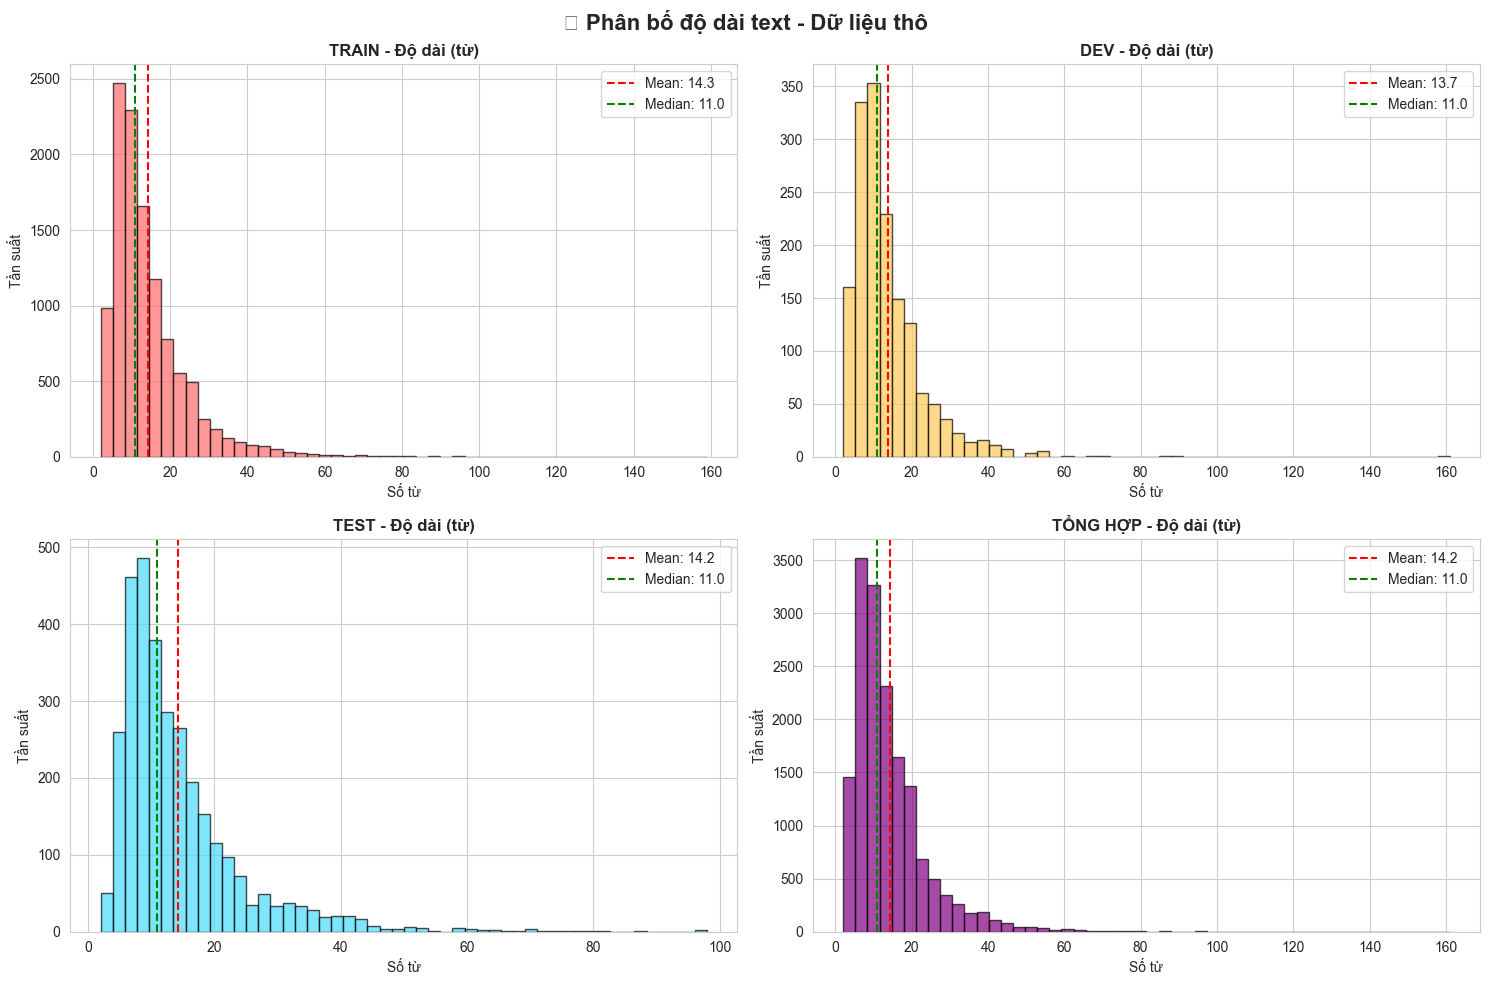


TỔNG HỢP - Độ dài text (từ): Min=2, Max=161, Mean=14.23, Median=11.00


In [5]:
# Phân tích độ dài text trong dữ liệu thô
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📏 Phân bố độ dài text - Dữ liệu thô', fontsize=16, fontweight='bold')

text_lengths = {}
for split_name, data in raw_data.items():
    lengths = [len(text.split()) for text in data['texts']]
    text_lengths[split_name] = lengths

# Plot histogram cho từng split
for idx, (split_name, lengths) in enumerate(text_lengths.items()):
    row, col = idx // 2, idx % 2
    
    axes[row, col].hist(lengths, bins=50, alpha=0.7, color=colors[idx], edgecolor='black')
    axes[row, col].set_title(f'{split_name.upper()} - Độ dài (từ)', fontweight='bold')
    axes[row, col].set_xlabel('Số từ')
    axes[row, col].set_ylabel('Tần suất')
    
    # Thống kê
    mean_len = np.mean(lengths)
    median_len = np.median(lengths)
    max_len = max(lengths)
    min_len = min(lengths)
    
    axes[row, col].axvline(mean_len, color='red', linestyle='--', label=f'Mean: {mean_len:.1f}')
    axes[row, col].axvline(median_len, color='green', linestyle='--', label=f'Median: {median_len:.1f}')
    axes[row, col].legend()
    
    print(f"{split_name.upper()} - Độ dài text (từ): Min={min_len}, Max={max_len}, Mean={mean_len:.2f}, Median={median_len:.2f}")

# Plot tổng hợp
all_lengths = []
for lengths in text_lengths.values():
    all_lengths.extend(lengths)

axes[1, 1].hist(all_lengths, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_title('TỔNG HỢP - Độ dài (từ)', fontweight='bold')
axes[1, 1].set_xlabel('Số từ')
axes[1, 1].set_ylabel('Tần suất')

mean_all = np.mean(all_lengths)
median_all = np.median(all_lengths)
axes[1, 1].axvline(mean_all, color='red', linestyle='--', label=f'Mean: {mean_all:.1f}')
axes[1, 1].axvline(median_all, color='green', linestyle='--', label=f'Median: {median_all:.1f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print(f"\nTỔNG HỢP - Độ dài text (từ): Min={min(all_lengths)}, Max={max(all_lengths)}, Mean={mean_all:.2f}, Median={median_all:.2f}")


In [6]:
# Tải dữ liệu đã tiền xử lý
def load_processed_data():
    """Tải dữ liệu đã được tiền xử lý"""
    processed_data = {}
    processed_path = '../data/processed'
    
    for split in ['train', 'dev', 'test']:
        file_path = os.path.join(processed_path, f'{split}.pkl')
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        processed_data[split] = data
        print(f"✅ Đã tải {split}: {len(data['texts'])} mẫu")
    
    return processed_data

# Tải tokenizer
tokenizer = AutoTokenizer.from_pretrained('../models/tokenizer')
print(f"📝 Tokenizer vocabulary size: {tokenizer.vocab_size}")

# Tải dữ liệu đã xử lý
processed_data = load_processed_data()
print(f"\n📁 Tổng số split đã xử lý: {len(processed_data)}")


📝 Tokenizer vocabulary size: 64000
✅ Đã tải train: 11426 mẫu
✅ Đã tải dev: 1583 mẫu
✅ Đã tải test: 3166 mẫu

📁 Tổng số split đã xử lý: 3


In [7]:
# Thống kê dữ liệu đã tiền xử lý
print("="*60)
print("🔧 THỐNG KÊ DỮ LIỆU ĐÃ TIỀN XỬ LÝ")
print("="*60)

total_processed = 0
for split_name, data in processed_data.items():
    n_samples = len(data['texts'])
    total_processed += n_samples
    
    # Thống kê sentiment
    sentiment_counts = Counter(data['sentiments'])
    topic_counts = Counter(data['topics'])
    
    # Thống kê về tokenization
    input_ids_shape = data['input_ids'].shape
    attention_mask_shape = data['attention_mask'].shape
    
    print(f"\n📁 {split_name.upper()}:")
    print(f"   Tổng mẫu: {n_samples:,}")
    print(f"   Sentiment: Negative={sentiment_counts[0]}, Neutral={sentiment_counts[1]}, Positive={sentiment_counts[2]}")
    print(f"   Topic: {dict(topic_counts)}")
    print(f"   Input IDs shape: {input_ids_shape}")
    print(f"   Attention mask shape: {attention_mask_shape}")

print(f"\n🔢 TỔNG CỘNG SAU XỬ LÝ: {total_processed:,} mẫu")


🔧 THỐNG KÊ DỮ LIỆU ĐÃ TIỀN XỬ LÝ

📁 TRAIN:
   Tổng mẫu: 11,426
   Sentiment: Negative=5325, Neutral=458, Positive=5643
   Topic: {1: 2201, 0: 8166, 3: 562, 2: 497}
   Input IDs shape: torch.Size([11426, 163])
   Attention mask shape: torch.Size([11426, 163])

📁 DEV:
   Tổng mẫu: 1,583
   Sentiment: Negative=705, Neutral=73, Positive=805
   Topic: {1: 267, 0: 1151, 3: 95, 2: 70}
   Input IDs shape: torch.Size([1583, 164])
   Attention mask shape: torch.Size([1583, 164])

📁 TEST:
   Tổng mẫu: 3,166
   Sentiment: Negative=1409, Neutral=167, Positive=1590
   Topic: {0: 2290, 1: 572, 3: 159, 2: 145}
   Input IDs shape: torch.Size([3166, 102])
   Attention mask shape: torch.Size([3166, 102])

🔢 TỔNG CỘNG SAU XỬ LÝ: 16,175 mẫu


📊 SO SÁNH SỐ LƯỢNG MẪU:
Split  Trước xử lý  Sau xử lý  Mất mát  Tỷ lệ giữ lại (%)
TRAIN        11426      11426        0              100.0
  DEV         1583       1583        0              100.0
 TEST         3166       3166        0              100.0


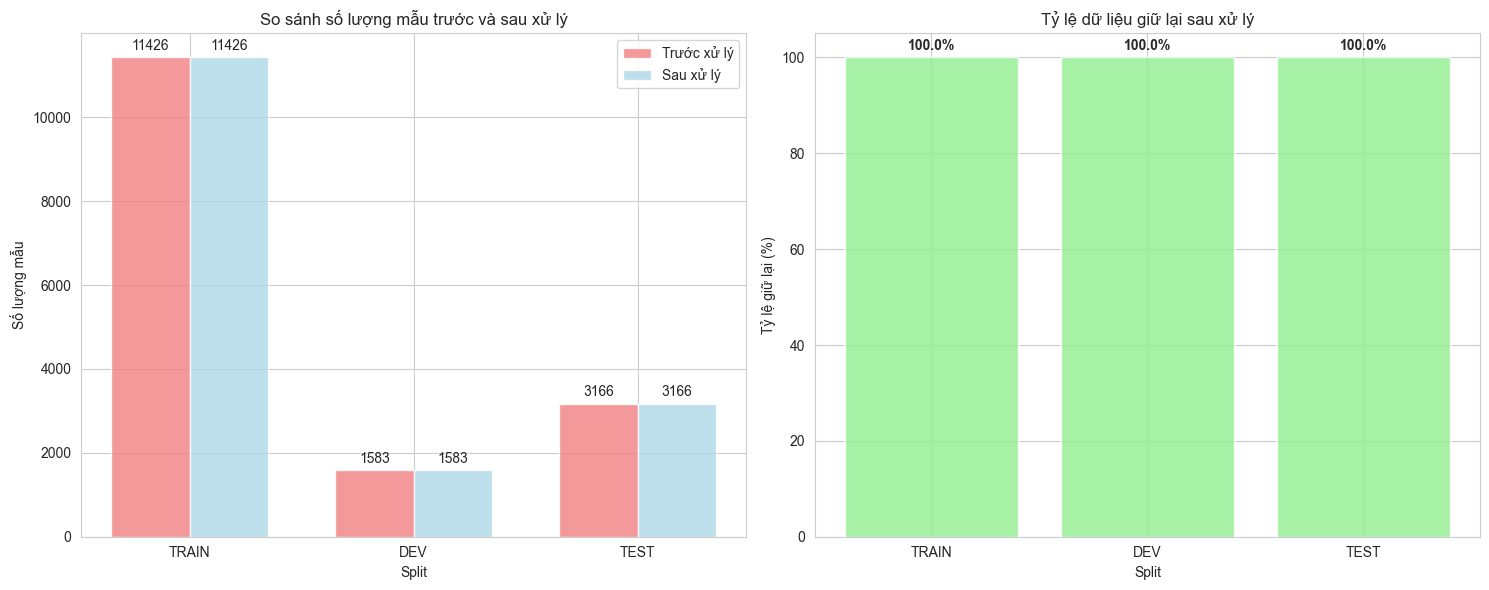

In [8]:
# So sánh số lượng mẫu trước và sau xử lý
comparison_data = []

for split_name in ['train', 'dev', 'test']:
    raw_count = len(raw_data[split_name]['texts'])
    processed_count = len(processed_data[split_name]['texts'])
    
    comparison_data.append({
        'Split': split_name.upper(),
        'Trước xử lý': raw_count,
        'Sau xử lý': processed_count,
        'Mất mát': raw_count - processed_count,
        'Tỷ lệ giữ lại (%)': round((processed_count / raw_count) * 100, 2)
    })

comparison_df = pd.DataFrame(comparison_data)
print("📊 SO SÁNH SỐ LƯỢNG MẪU:")
print(comparison_df.to_string(index=False))

# Visualize so sánh
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ cột so sánh số lượng
splits = comparison_df['Split']
raw_counts = comparison_df['Trước xử lý']
processed_counts = comparison_df['Sau xử lý']

x = np.arange(len(splits))
width = 0.35

ax1.bar(x - width/2, raw_counts, width, label='Trước xử lý', color='lightcoral', alpha=0.8)
ax1.bar(x + width/2, processed_counts, width, label='Sau xử lý', color='lightblue', alpha=0.8)

ax1.set_xlabel('Split')
ax1.set_ylabel('Số lượng mẫu')
ax1.set_title('So sánh số lượng mẫu trước và sau xử lý')
ax1.set_xticks(x)
ax1.set_xticklabels(splits)
ax1.legend()

# Thêm số liệu lên cột
for i, (raw, processed) in enumerate(zip(raw_counts, processed_counts)):
    ax1.text(i - width/2, raw + max(raw_counts)*0.01, str(raw), ha='center', va='bottom')
    ax1.text(i + width/2, processed + max(processed_counts)*0.01, str(processed), ha='center', va='bottom')

# Biểu đồ tỷ lệ giữ lại
retention_rates = comparison_df['Tỷ lệ giữ lại (%)']
ax2.bar(splits, retention_rates, color='lightgreen', alpha=0.8)
ax2.set_xlabel('Split')
ax2.set_ylabel('Tỷ lệ giữ lại (%)')
ax2.set_title('Tỷ lệ dữ liệu giữ lại sau xử lý')
ax2.set_ylim(0, 105)

# Thêm số liệu lên cột
for i, rate in enumerate(retention_rates):
    ax2.text(i, rate + 1, f'{rate}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


📏 PHÂN TÍCH ĐỘ DÀI SAU TOKENIZATION:

TRAIN:
  Min tokens: 4
  Max tokens: 163
  Mean tokens: 16.60
  Median tokens: 14.00

DEV:
  Min tokens: 4
  Max tokens: 164
  Mean tokens: 15.91
  Median tokens: 13.00

TEST:
  Min tokens: 4
  Max tokens: 102
  Mean tokens: 16.55
  Median tokens: 13.00


C:\Users\huynh\AppData\Local\Temp\ipykernel_2008\3310582757.py:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\huynh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


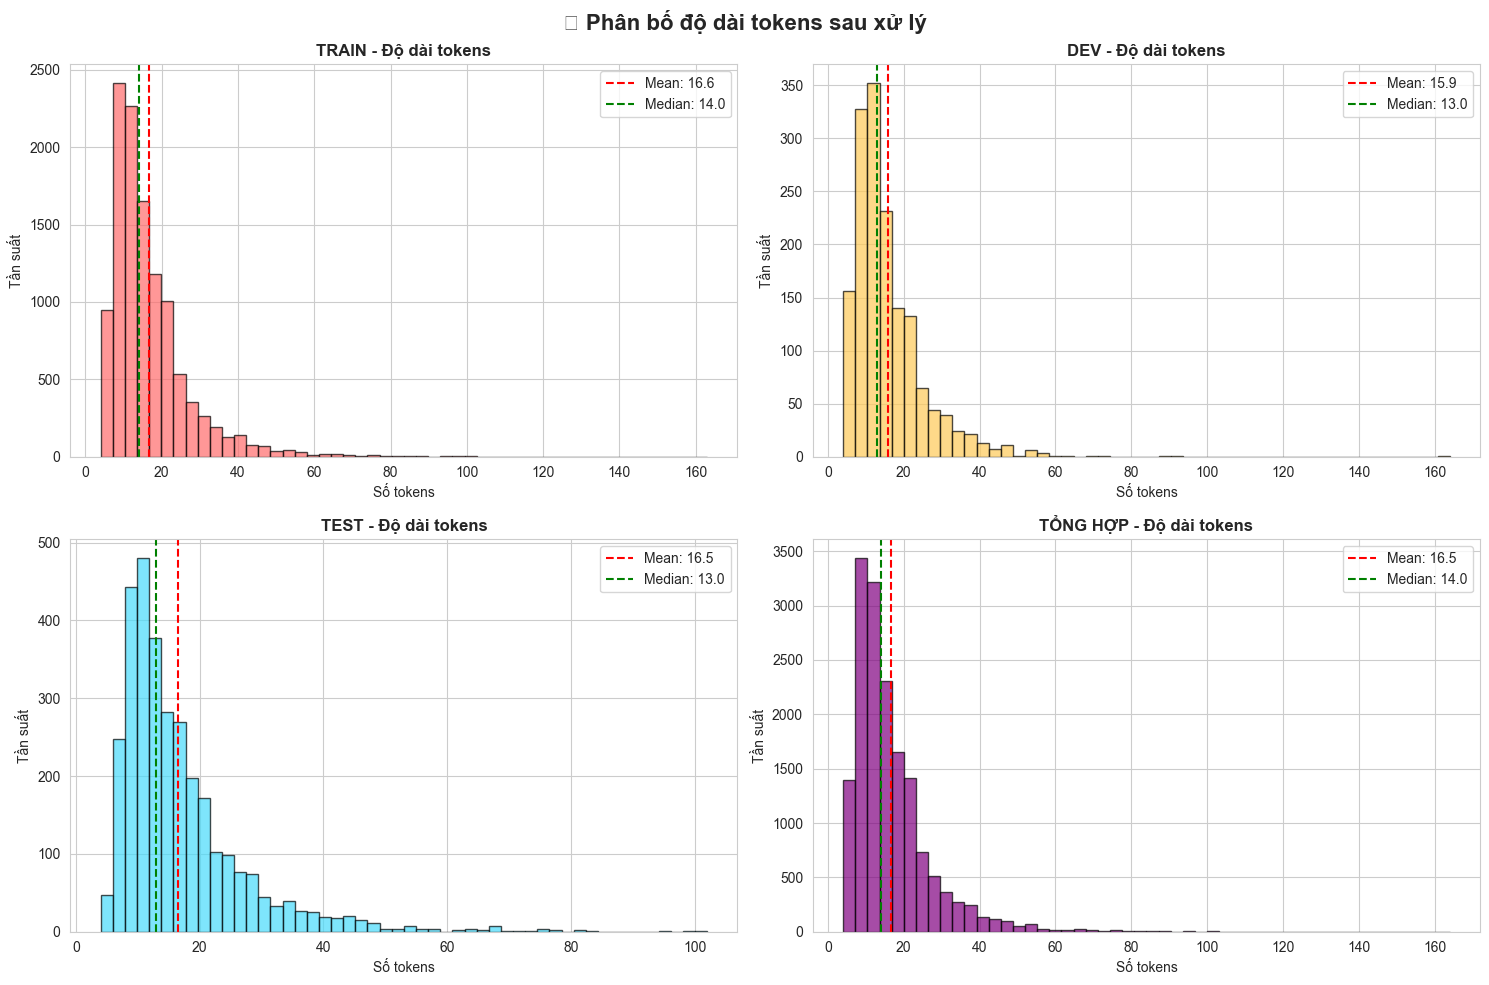


TỔNG HỢP - Độ dài tokens: Min=4, Max=164, Mean=16.52, Median=14.00


In [9]:
# Phân tích độ dài sau tokenization
print("📏 PHÂN TÍCH ĐỘ DÀI SAU TOKENIZATION:")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Phân bố độ dài tokens sau xử lý', fontsize=16, fontweight='bold')

token_lengths = {}
for split_name, data in processed_data.items():
    # Tính độ dài token cho mỗi mẫu (không tính padding)
    lengths = []
    for attention_mask in data['attention_mask']:
        # Đếm số token thực (không phải padding)
        actual_length = attention_mask.sum().item()
        lengths.append(actual_length)
    
    token_lengths[split_name] = lengths
    
    # Thống kê
    mean_len = np.mean(lengths)
    median_len = np.median(lengths)
    max_len = max(lengths)
    min_len = min(lengths)
    
    print(f"\n{split_name.upper()}:")
    print(f"  Min tokens: {min_len}")
    print(f"  Max tokens: {max_len}")
    print(f"  Mean tokens: {mean_len:.2f}")
    print(f"  Median tokens: {median_len:.2f}")

# Plot histogram cho từng split
for idx, (split_name, lengths) in enumerate(token_lengths.items()):
    row, col = idx // 2, idx % 2
    
    axes[row, col].hist(lengths, bins=50, alpha=0.7, color=colors[idx], edgecolor='black')
    axes[row, col].set_title(f'{split_name.upper()} - Độ dài tokens', fontweight='bold')
    axes[row, col].set_xlabel('Số tokens')
    axes[row, col].set_ylabel('Tần suất')
    
    mean_len = np.mean(lengths)
    median_len = np.median(lengths)
    axes[row, col].axvline(mean_len, color='red', linestyle='--', label=f'Mean: {mean_len:.1f}')
    axes[row, col].axvline(median_len, color='green', linestyle='--', label=f'Median: {median_len:.1f}')
    axes[row, col].legend()

# Plot tổng hợp
all_token_lengths = []
for lengths in token_lengths.values():
    all_token_lengths.extend(lengths)

axes[1, 1].hist(all_token_lengths, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].set_title('TỔNG HỢP - Độ dài tokens', fontweight='bold')
axes[1, 1].set_xlabel('Số tokens')
axes[1, 1].set_ylabel('Tần suất')

mean_all = np.mean(all_token_lengths)
median_all = np.median(all_token_lengths)
axes[1, 1].axvline(mean_all, color='red', linestyle='--', label=f'Mean: {mean_all:.1f}')
axes[1, 1].axvline(median_all, color='green', linestyle='--', label=f'Median: {median_all:.1f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print(f"\nTỔNG HỢP - Độ dài tokens: Min={min(all_token_lengths)}, Max={max(all_token_lengths)}, Mean={mean_all:.2f}, Median={median_all:.2f}")


In [10]:
# Phân tích mẫu text trước và sau xử lý
print("🔍 MẪU TEXT TRƯỚC VÀ SAU XỬ LÝ:")
print("="*60)

# Lấy một vài mẫu để so sánh
sample_indices = [0, 100, 500]

for split_name in ['train']:  # Chỉ xem train set
    print(f"\n📁 {split_name.upper()} SAMPLES:")
    
    for idx in sample_indices:
        if idx < len(raw_data[split_name]['texts']):
            raw_text = raw_data[split_name]['texts'][idx]
            processed_text = processed_data[split_name]['texts'][idx]
            sentiment = processed_data[split_name]['sentiments'][idx]
            sentiment_label = processed_data[split_name]['sentiment_labels'][idx]
            
            # Tokenize để xem kết quả
            tokens = tokenizer.tokenize(processed_text)
            input_ids = processed_data[split_name]['input_ids'][idx]
            attention_mask = processed_data[split_name]['attention_mask'][idx]
            
            # Số token thực (không tính padding)
            actual_tokens = attention_mask.sum().item()
            
            print(f"\n--- Mẫu {idx} ---")
            print(f"Text gốc: {raw_text}")
            print(f"Text sau xử lý: {processed_text}")
            print(f"Sentiment: {sentiment} ({sentiment_label})")
            print(f"Số từ: {len(processed_text.split())}")
            print(f"Số tokens: {actual_tokens}")
            print(f"Một vài tokens đầu: {tokens[:10]}")
            print("-" * 50)


🔍 MẪU TEXT TRƯỚC VÀ SAU XỬ LÝ:

📁 TRAIN SAMPLES:

--- Mẫu 0 ---
Text gốc: slide giáo trình đầy đủ .
Text sau xử lý: slide giáo trình đầy đủ .
Sentiment: 2 (positive)
Số từ: 6
Số tokens: 8
Một vài tokens đầu: ['slide', 'giáo', 'trình', 'đầy', 'đủ', '.']
--------------------------------------------------

--- Mẫu 100 ---
Text gốc: tôi cảm thấy giảng viên dạy rất tốt .
Text sau xử lý: tôi cảm thấy giảng viên dạy rất tốt .
Sentiment: 2 (positive)
Số từ: 9
Số tokens: 11
Một vài tokens đầu: ['tôi', 'cảm', 'thấy', 'giảng', 'viên', 'dạy', 'rất', 'tốt', '.']
--------------------------------------------------

--- Mẫu 500 ---
Text gốc: giảng viên chưa bám sát được sinh viên .
Text sau xử lý: giảng viên chưa bám sát được sinh viên .
Sentiment: 0 (negative)
Số từ: 9
Số tokens: 11
Một vài tokens đầu: ['giảng', 'viên', 'chưa', 'bám', 'sát', 'được', 'sinh', 'viên', '.']
--------------------------------------------------



📊 TRAIN - So sánh sentiment:
  Negative: 5325 → 5325 (mất: 0)
  Neutral: 458 → 458 (mất: 0)
  Positive: 5643 → 5643 (mất: 0)

📊 DEV - So sánh sentiment:
  Negative: 705 → 705 (mất: 0)
  Neutral: 73 → 73 (mất: 0)
  Positive: 805 → 805 (mất: 0)

📊 TEST - So sánh sentiment:
  Negative: 1409 → 1409 (mất: 0)
  Neutral: 167 → 167 (mất: 0)
  Positive: 1590 → 1590 (mất: 0)


C:\Users\huynh\AppData\Local\Temp\ipykernel_2008\2429757318.py:43: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\huynh\AppData\Local\Temp\ipykernel_2008\2429757318.py:43: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\huynh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\huynh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


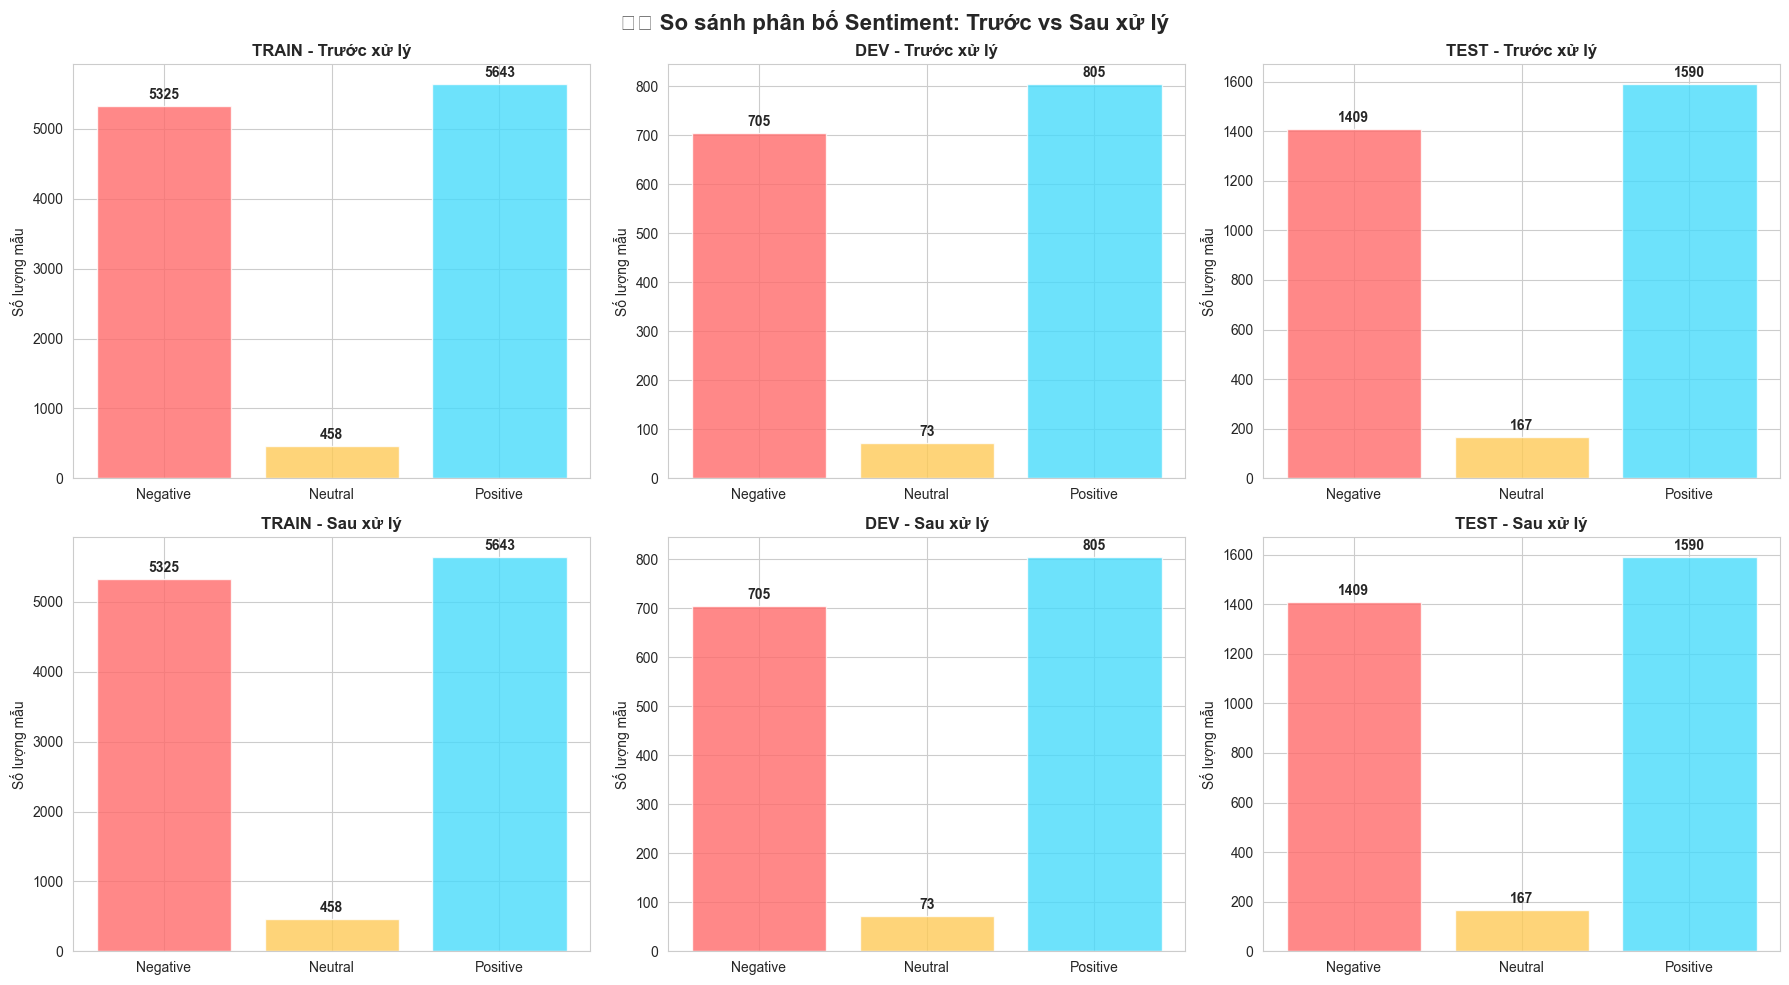


📊 TỶ LỆ PHÂN BỐ SENTIMENT (%):

TRAIN:
  Negative: 5,325 (46.6%)
  Neutral: 458 (4.0%)
  Positive: 5,643 (49.4%)

DEV:
  Negative: 705 (44.5%)
  Neutral: 73 (4.6%)
  Positive: 805 (50.9%)

TEST:
  Negative: 1,409 (44.5%)
  Neutral: 167 (5.3%)
  Positive: 1,590 (50.2%)


In [11]:
# So sánh phân bố sentiment trước và sau xử lý
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('⚖️ So sánh phân bố Sentiment: Trước vs Sau xử lý', fontsize=16, fontweight='bold')

sentiment_labels = ['Negative', 'Neutral', 'Positive']
colors = ['#ff6b6b', '#feca57', '#48dbfb']

for idx, split_name in enumerate(['train', 'dev', 'test']):
    # Dữ liệu thô
    raw_sentiment_counts = Counter(raw_data[split_name]['sentiments'])
    raw_counts = [raw_sentiment_counts[i] for i in range(3)]
    
    # Dữ liệu đã xử lý
    processed_sentiment_counts = Counter(processed_data[split_name]['sentiments'])
    processed_counts = [processed_sentiment_counts[i] for i in range(3)]
    
    # Plot trước xử lý
    axes[0, idx].bar(sentiment_labels, raw_counts, color=colors, alpha=0.8)
    axes[0, idx].set_title(f'{split_name.upper()} - Trước xử lý', fontweight='bold')
    axes[0, idx].set_ylabel('Số lượng mẫu')
    
    for i, count in enumerate(raw_counts):
        axes[0, idx].text(i, count + max(raw_counts)*0.01, str(count), 
                         ha='center', va='bottom', fontweight='bold')
    
    # Plot sau xử lý
    axes[1, idx].bar(sentiment_labels, processed_counts, color=colors, alpha=0.8)
    axes[1, idx].set_title(f'{split_name.upper()} - Sau xử lý', fontweight='bold')
    axes[1, idx].set_ylabel('Số lượng mẫu')
    
    for i, count in enumerate(processed_counts):
        axes[1, idx].text(i, count + max(processed_counts)*0.01, str(count), 
                         ha='center', va='bottom', fontweight='bold')
    
    # In thống kê so sánh
    print(f"\n📊 {split_name.upper()} - So sánh sentiment:")
    for i, label in enumerate(sentiment_labels):
        raw_c = raw_counts[i]
        proc_c = processed_counts[i]
        diff = raw_c - proc_c
        print(f"  {label}: {raw_c} → {proc_c} (mất: {diff})")

plt.tight_layout()
plt.show()

# Tính tỷ lệ phân bố
print("\n📊 TỶ LỆ PHÂN BỐ SENTIMENT (%):")
print("="*50)

for split_name in ['train', 'dev', 'test']:
    total = len(processed_data[split_name]['sentiments'])
    sentiment_counts = Counter(processed_data[split_name]['sentiments'])
    
    print(f"\n{split_name.upper()}:")
    for i, label in enumerate(sentiment_labels):
        count = sentiment_counts[i]
        percentage = (count / total) * 100
        print(f"  {label}: {count:,} ({percentage:.1f}%)")
